**IMPORTING DATA LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score, plot_confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import os
import warnings
from sklearn.exceptions import ConvergenceWarning
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

**LOADING THE DATASET**

In [3]:
train = pd.read_csv('D:\workfuck\VVVV\Total Sales whole.csv', parse_dates = True, index_col = 'Date')

d:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '21/11/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
d:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '22/11/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
d:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '23/11/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
d:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '25/11/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

In [4]:
train.head()

,Orders,Sales,Cash,Talabat Card,Deliveroo Card,Carriage Card,Zomato Card,Uber Eats,Paid Online,Unpaid,Avg Per cheque,Branch
Date,,,,,,,,,,,,
2017-11-21,25,2627.0,1591.0,1036.0,0.0,0.0,0.0,0.0,0,0.0,105.08,Airport Road
2017-11-22,15,1449.0,1194.0,255.0,0.0,0.0,0.0,0.0,0,0.0,96.60,Airport Road
2017-11-23,11,1241.0,524.0,420.0,297.0,0.0,0.0,0.0,0,0.0,112.82,Airport Road
2017-11-25,13,843.0,531.0,312.0,0.0,0.0,0.0,0.0,0,0.0,64.85,Airport Road
2017-11-26,10,778.0,577.0,201.0,0.0,0.0,0.0,0.0,0,0.0,77.80,Airport Road


In [5]:
train.shape

(4206, 12)

In [6]:
train.describe()

,Orders,Sales,Cash,Talabat Card,Deliveroo Card,Carriage Card,Zomato Card,Uber Eats,Paid Online,Unpaid,Avg Per cheque
count,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000
mean,35.396576,3559.999536,1229.372556,1288.674232,286.750040,440.751222,253.621755,54.087340,0.131003,5.907275,92.406645
std,18.071522,1933.558523,951.810197,1029.424916,384.385105,598.226587,505.665357,209.392558,8.496048,53.332635,30.756414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2165.750000,448.762500,570.875000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.210000
50%,37.000000,3654.500000,1075.875000,1096.000000,133.500000,199.250000,0.000000,0.000000,0.000000,0.000000,99.215000
75%,47.000000,4867.375000,1817.750000,1773.375000,451.187500,732.300000,298.950000,0.000000,0.000000,0.000000,109.710000
max,143.000000,10541.200000,7301.000000,7509.000000,3785.000000,6226.000000,4758.000000,3615.000000,551.000000,1051.000000,180.430000


**DATA VISUALIZATION**

array([[<AxesSubplot:title={'center':'Orders'}>,
        <AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Cash'}>],
       [<AxesSubplot:title={'center':'Talabat Card'}>,
        <AxesSubplot:title={'center':'Deliveroo Card'}>,
        <AxesSubplot:title={'center':'Carriage Card'}>],
       [<AxesSubplot:title={'center':'Zomato Card'}>,
        <AxesSubplot:title={'center':'Uber Eats '}>,
        <AxesSubplot:title={'center':'Paid Online'}>],
       [<AxesSubplot:title={'center':'Unpaid'}>,
        <AxesSubplot:title={'center':'Avg Per cheque'}>, <AxesSubplot:>]],
      dtype=object)

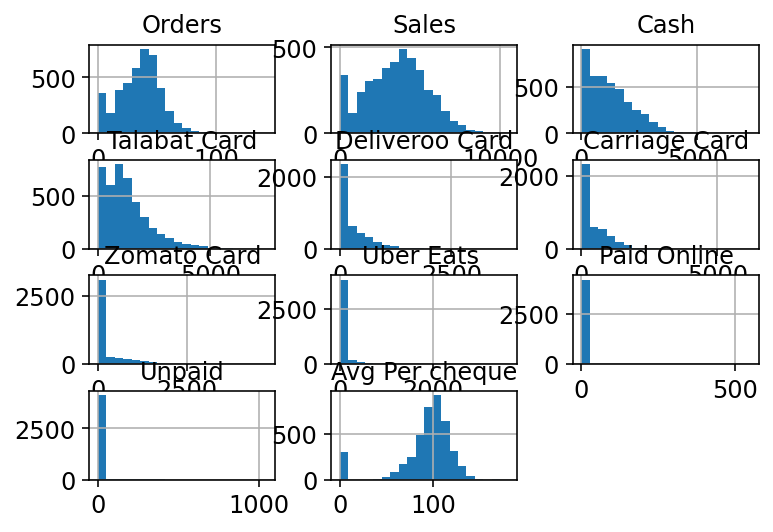

In [7]:
train.hist(bins=20)

<AxesSubplot:xlabel='Date'>

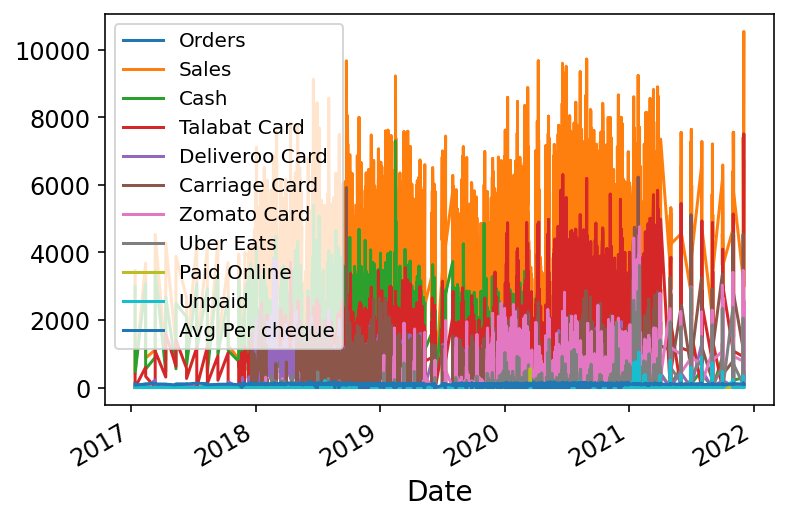

In [8]:
train.plot()

<AxesSubplot:ylabel='Date'>

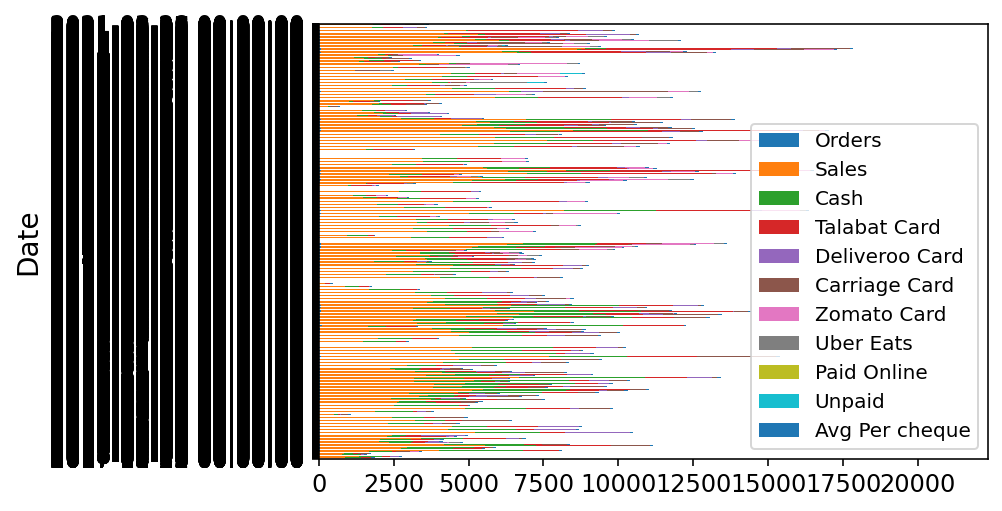

In [9]:
train.plot.barh(stacked=True)

<AxesSubplot:ylabel='Frequency'>

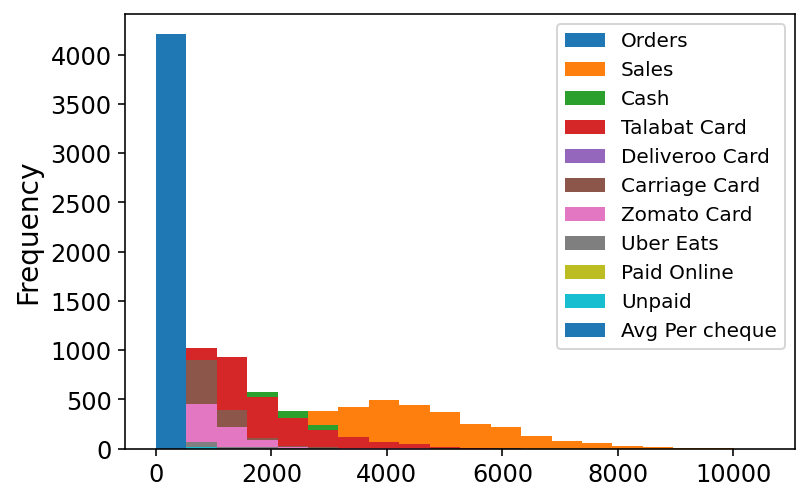

In [10]:
train.plot.hist(bins=20)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4206 entries, 2017-11-21 to 2021-03-28
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Orders          4206 non-null   int64  
 1   Sales           4206 non-null   float64
 2   Cash            4206 non-null   float64
 3   Talabat Card    4206 non-null   float64
 4   Deliveroo Card  4206 non-null   float64
 5   Carriage Card   4206 non-null   float64
 6   Zomato Card     4206 non-null   float64
 7   Uber Eats       4206 non-null   float64
 8   Paid Online     4206 non-null   int64  
 9   Unpaid          4206 non-null   float64
 10  Avg Per cheque  4206 non-null   float64
 11  Branch          4206 non-null   object 
dtypes: float64(9), int64(2), object(1)
memory usage: 427.2+ KB


In [12]:
train['Sales_Per_Order'] = train['Sales']/train['Orders']
train['Sales_Per_Order'].head()

Date
2017-11-21    105.080000
2017-11-22     96.600000
2017-11-23    112.818182
2017-11-25     64.846154
2017-11-26     77.800000
Name: Sales_Per_Order, dtype: float64

In [13]:
missing = train.isnull().sum()
missing.sort_values(ascending=False)

Sales_Per_Order    305
Orders               0
Sales                0
Cash                 0
Talabat Card         0
Deliveroo Card       0
Carriage Card        0
Zomato Card          0
Uber Eats            0
Paid Online          0
Unpaid               0
Avg Per cheque       0
Branch               0
dtype: int64

In [14]:
train.dropna().head()

,Orders,Sales,Cash,Talabat Card,Deliveroo Card,Carriage Card,Zomato Card,Uber Eats,Paid Online,Unpaid,Avg Per cheque,Branch,Sales_Per_Order
Date,,,,,,,,,,,,,
2017-11-21,25,2627.0,1591.0,1036.0,0.0,0.0,0.0,0.0,0,0.0,105.08,Airport Road,105.080000
2017-11-22,15,1449.0,1194.0,255.0,0.0,0.0,0.0,0.0,0,0.0,96.60,Airport Road,96.600000
2017-11-23,11,1241.0,524.0,420.0,297.0,0.0,0.0,0.0,0,0.0,112.82,Airport Road,112.818182
2017-11-25,13,843.0,531.0,312.0,0.0,0.0,0.0,0.0,0,0.0,64.85,Airport Road,64.846154
2017-11-26,10,778.0,577.0,201.0,0.0,0.0,0.0,0.0,0,0.0,77.80,Airport Road,77.800000


**Predicting sales using Naive Model**

In [15]:
train['Sales_Per_Order'] = train['Sales']/train['Orders']
train['Sales_Per_Order'].head()

Date
2017-11-21    105.080000
2017-11-22     96.600000
2017-11-23    112.818182
2017-11-25     64.846154
2017-11-26     77.800000
Name: Sales_Per_Order, dtype: float64

In [16]:
train = train.dropna()

In [17]:
train

,Orders,Sales,Cash,Talabat Card,Deliveroo Card,Carriage Card,Zomato Card,Uber Eats,Paid Online,Unpaid,Avg Per cheque,Branch,Sales_Per_Order
Date,,,,,,,,,,,,,
2017-11-21,25,2627.0,1591.0,1036.0,0.0,0.0,0.0,0.0,0,0.0,105.08,Airport Road,105.080000
2017-11-22,15,1449.0,1194.0,255.0,0.0,0.0,0.0,0.0,0,0.0,96.60,Airport Road,96.600000
2017-11-23,11,1241.0,524.0,420.0,297.0,0.0,0.0,0.0,0,0.0,112.82,Airport Road,112.818182
2017-11-25,13,843.0,531.0,312.0,0.0,0.0,0.0,0.0,0,0.0,64.85,Airport Road,64.846154
2017-11-26,10,778.0,577.0,201.0,0.0,0.0,0.0,0.0,0,0.0,77.80,Airport Road,77.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-24,29,3319.0,521.8,1148.0,237.0,1273.0,0.0,56.0,0,83.2,114.45,Al Ain,114.448276
2021-03-25,29,3461.4,228.0,1374.0,1203.0,656.4,0.0,0.0,0,0.0,119.36,Al Ain,119.358621
2021-03-26,37,3873.2,207.0,1619.0,1192.0,764.0,0.0,0.0,0,91.2,104.68,Al Ain,104.681081


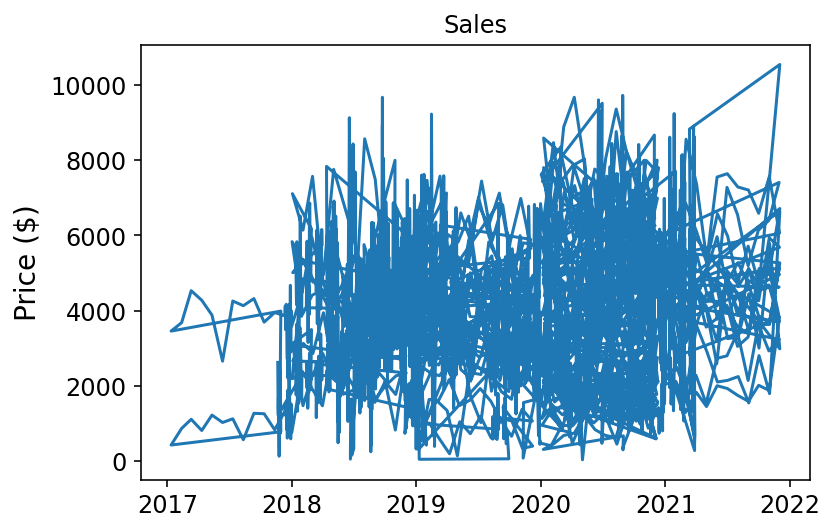

In [18]:
plt.plot(train.index, train['Sales'])
plt.title('Sales')
plt.ylabel('Price ($)');
plt.show()

In [19]:
train.head()

,Orders,Sales,Cash,Talabat Card,Deliveroo Card,Carriage Card,Zomato Card,Uber Eats,Paid Online,Unpaid,Avg Per cheque,Branch,Sales_Per_Order
Date,,,,,,,,,,,,,
2017-11-21,25,2627.0,1591.0,1036.0,0.0,0.0,0.0,0.0,0,0.0,105.08,Airport Road,105.080000
2017-11-22,15,1449.0,1194.0,255.0,0.0,0.0,0.0,0.0,0,0.0,96.60,Airport Road,96.600000
2017-11-23,11,1241.0,524.0,420.0,297.0,0.0,0.0,0.0,0,0.0,112.82,Airport Road,112.818182
2017-11-25,13,843.0,531.0,312.0,0.0,0.0,0.0,0.0,0,0.0,64.85,Airport Road,64.846154
2017-11-26,10,778.0,577.0,201.0,0.0,0.0,0.0,0.0,0,0.0,77.80,Airport Road,77.800000


In [20]:
train['Year'] = train.index.date

train.reset_index(level=0, inplace = True)

C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_4608\417302632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Year'] = train.index.date


<AxesSubplot:xlabel='Sales', ylabel='Date'>

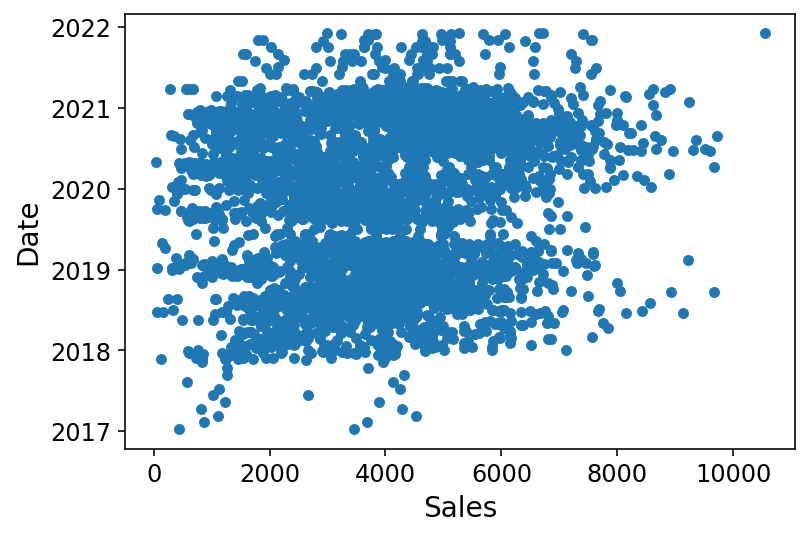

In [21]:
train.plot.scatter(x='Sales', y='Date')

In [22]:
rows = len(train.axes[0])
 # computing number of columns
cols = len(train.axes[1])
print(train)

           Date  Orders   Sales    Cash  Talabat Card  Deliveroo Card  \
0    2017-11-21      25  2627.0  1591.0        1036.0             0.0   
1    2017-11-22      15  1449.0  1194.0         255.0             0.0   
2    2017-11-23      11  1241.0   524.0         420.0           297.0   
3    2017-11-25      13   843.0   531.0         312.0             0.0   
4    2017-11-26      10   778.0   577.0         201.0             0.0   
...         ...     ...     ...     ...           ...             ...   
3896 2021-03-24      29  3319.0   521.8        1148.0           237.0   
3897 2021-03-25      29  3461.4   228.0        1374.0          1203.0   
3898 2021-03-26      37  3873.2   207.0        1619.0          1192.0   
3899 2021-03-27      20  2398.0     0.0        1279.0           810.0   
3900 2021-03-28       5   557.0     0.0         387.0           170.0   

      Carriage Card  Zomato Card  Uber Eats   Paid Online  Unpaid  \
0               0.0          0.0         0.0          

In [23]:
train_store=train[0:3120] 
test_store=train[3120:]

In [24]:
test_store

,Date,Orders,Sales,Cash,Talabat Card,Deliveroo Card,Carriage Card,Zomato Card,Uber Eats,Paid Online,Unpaid,Avg Per cheque,Branch,Sales_Per_Order,Year
3120,2020-09-21,24,2157.6,316.6,1068.0,47.0,726.0,0.0,0.0,0,0.0,89.90,Al Ain,89.900000,2020-09-21
3121,2020-09-22,18,2242.6,574.0,1285.0,66.0,317.6,0.0,0.0,0,0.0,124.59,Al Ain,124.588889,2020-09-22
3122,2020-09-23,30,2626.2,259.8,1620.0,206.0,514.0,26.4,0.0,0,0.0,87.54,Al Ain,87.540000,2020-09-23
3123,2020-09-24,21,2155.8,706.0,930.0,66.0,453.8,0.0,0.0,0,0.0,102.66,Al Ain,102.657143,2020-09-24
3124,2020-09-25,22,2469.2,55.8,1245.0,269.0,899.4,0.0,0.0,0,0.0,112.24,Al Ain,112.236364,2020-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,2021-03-24,29,3319.0,521.8,1148.0,237.0,1273.0,0.0,56.0,0,83.2,114.45,Al Ain,114.448276,2021-03-24
3897,2021-03-25,29,3461.4,228.0,1374.0,1203.0,656.4,0.0,0.0,0,0.0,119.36,Al Ain,119.358621,2021-03-25
3898,2021-03-26,37,3873.2,207.0,1619.0,1192.0,764.0,0.0,0.0,0,91.2,104.68,Al Ain,104.681081,2021-03-26
3899,2021-03-27,20,2398.0,0.0,1279.0,810.0,309.0,0.0,0.0,0,0.0,119.90,Al Ain,119.900000,2021-03-27


In [25]:
train_store.Date = pd.to_datetime(train_store.Date, format="%Y-%m-%d")
train_store.index = train_store.Date
test_store.Date = pd.to_datetime(test_store.Date, format="%Y-%m-%d")
test_store.index = test_store.Date
train_store = train_store.resample('D').mean()
train_store = train_store.interpolate(method='linear')

test_store = test_store.resample('D').mean()
test_store = test_store.interpolate(method='linear')

C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_4608\2886601933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_store.Date = pd.to_datetime(train_store.Date, format="%Y-%m-%d")
C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_4608\2886601933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_store.Date = pd.to_datetime(test_store.Date, format="%Y-%m-%d")


<AxesSubplot:title={'center':'daily sales'}, xlabel='Date'>

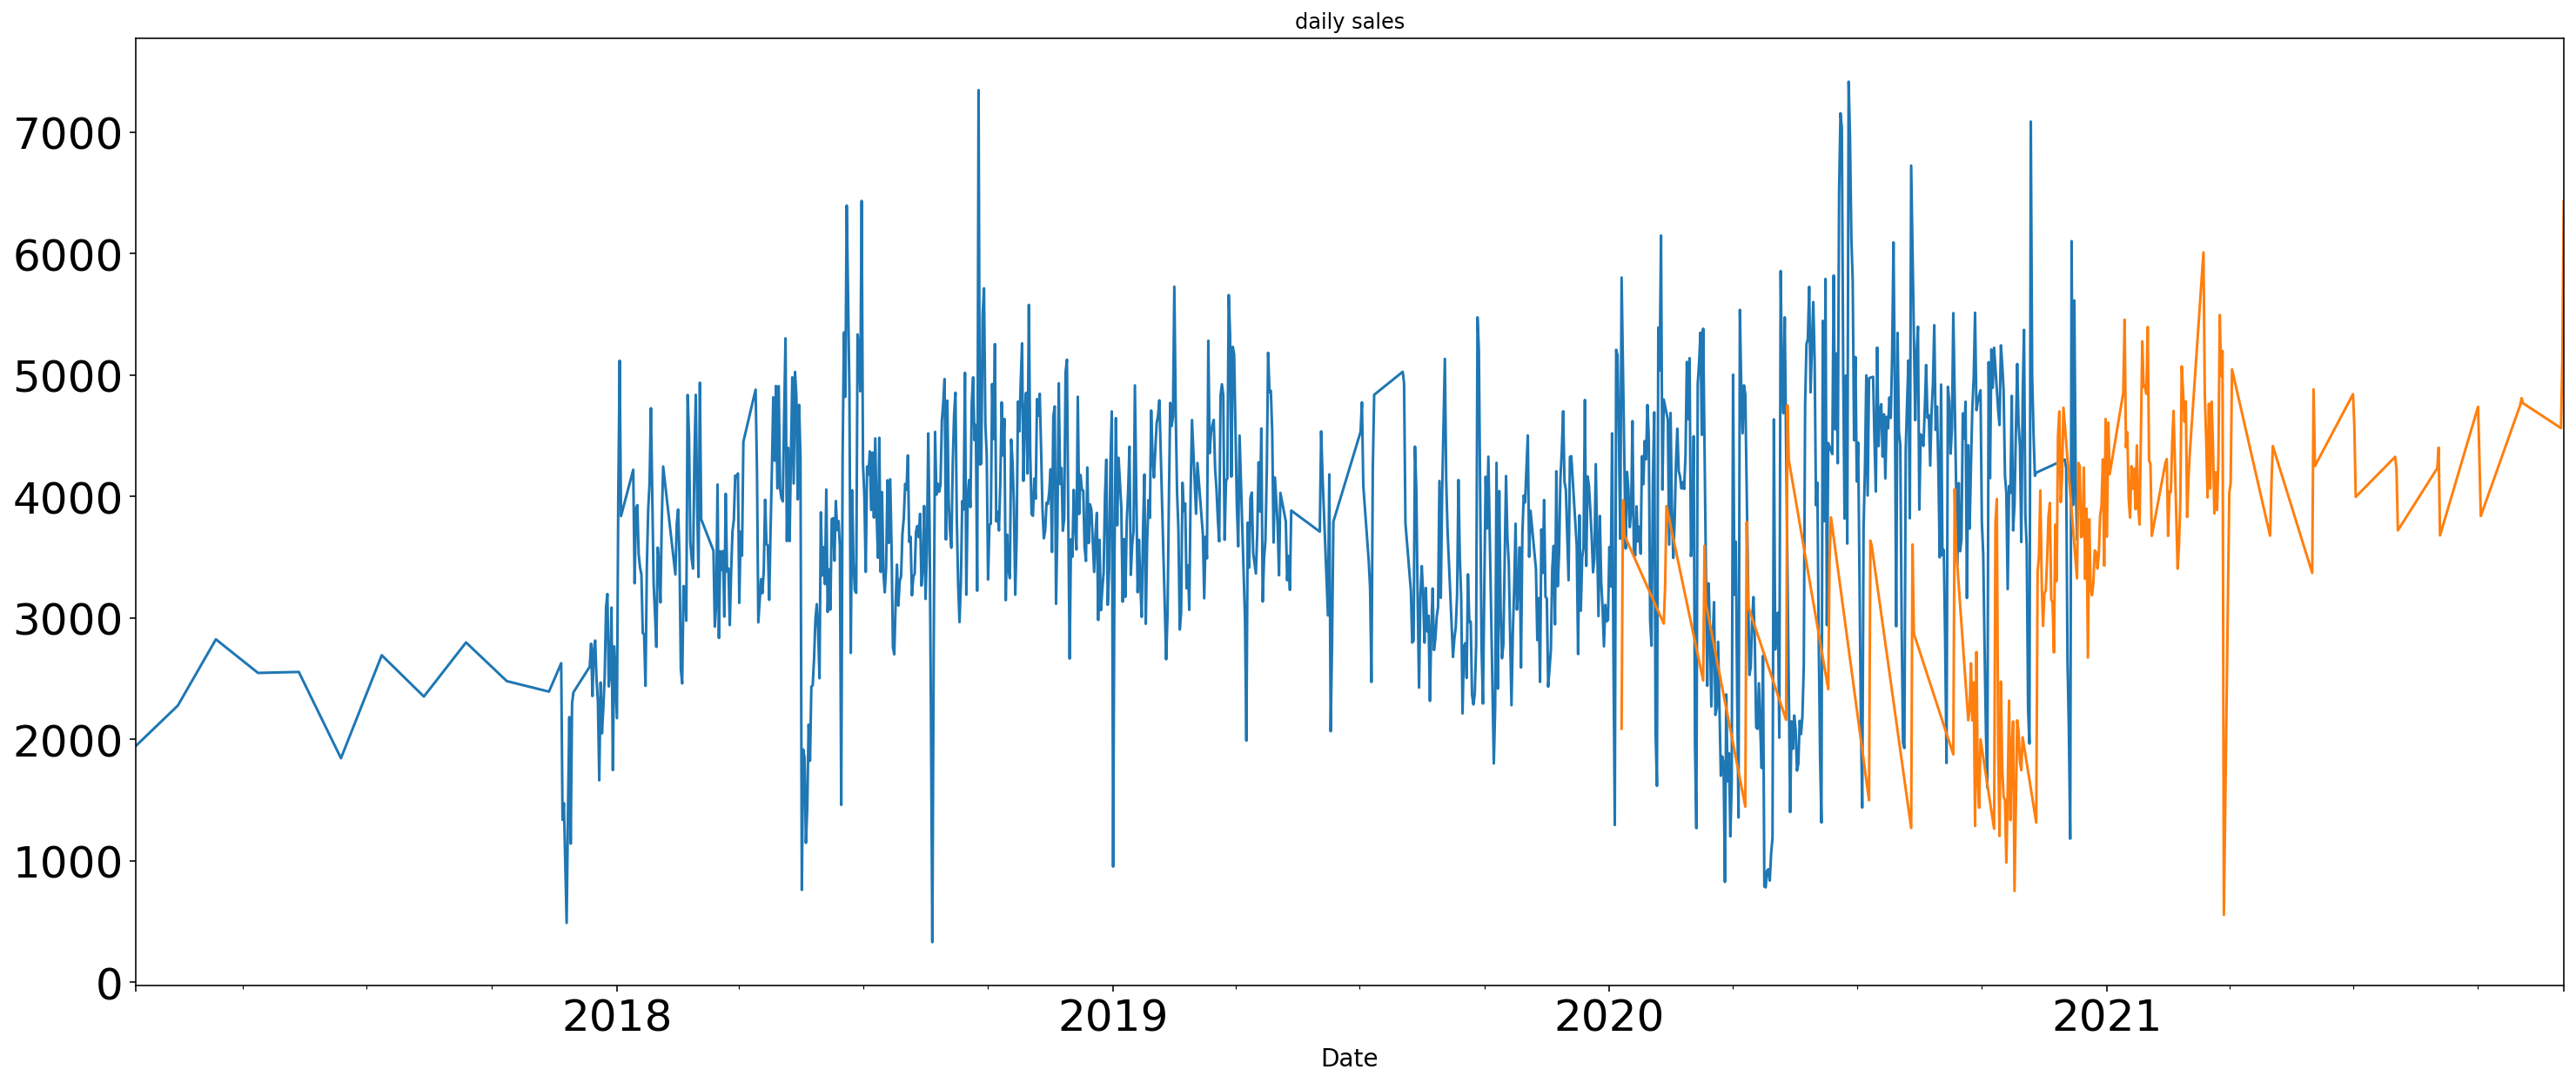

In [26]:
train_store.Sales.plot(figsize=(25,10), title='daily sales', fontsize=25)
test_store.Sales.plot()

Text(0.5, 1.0, 'Moving Average Forecast')

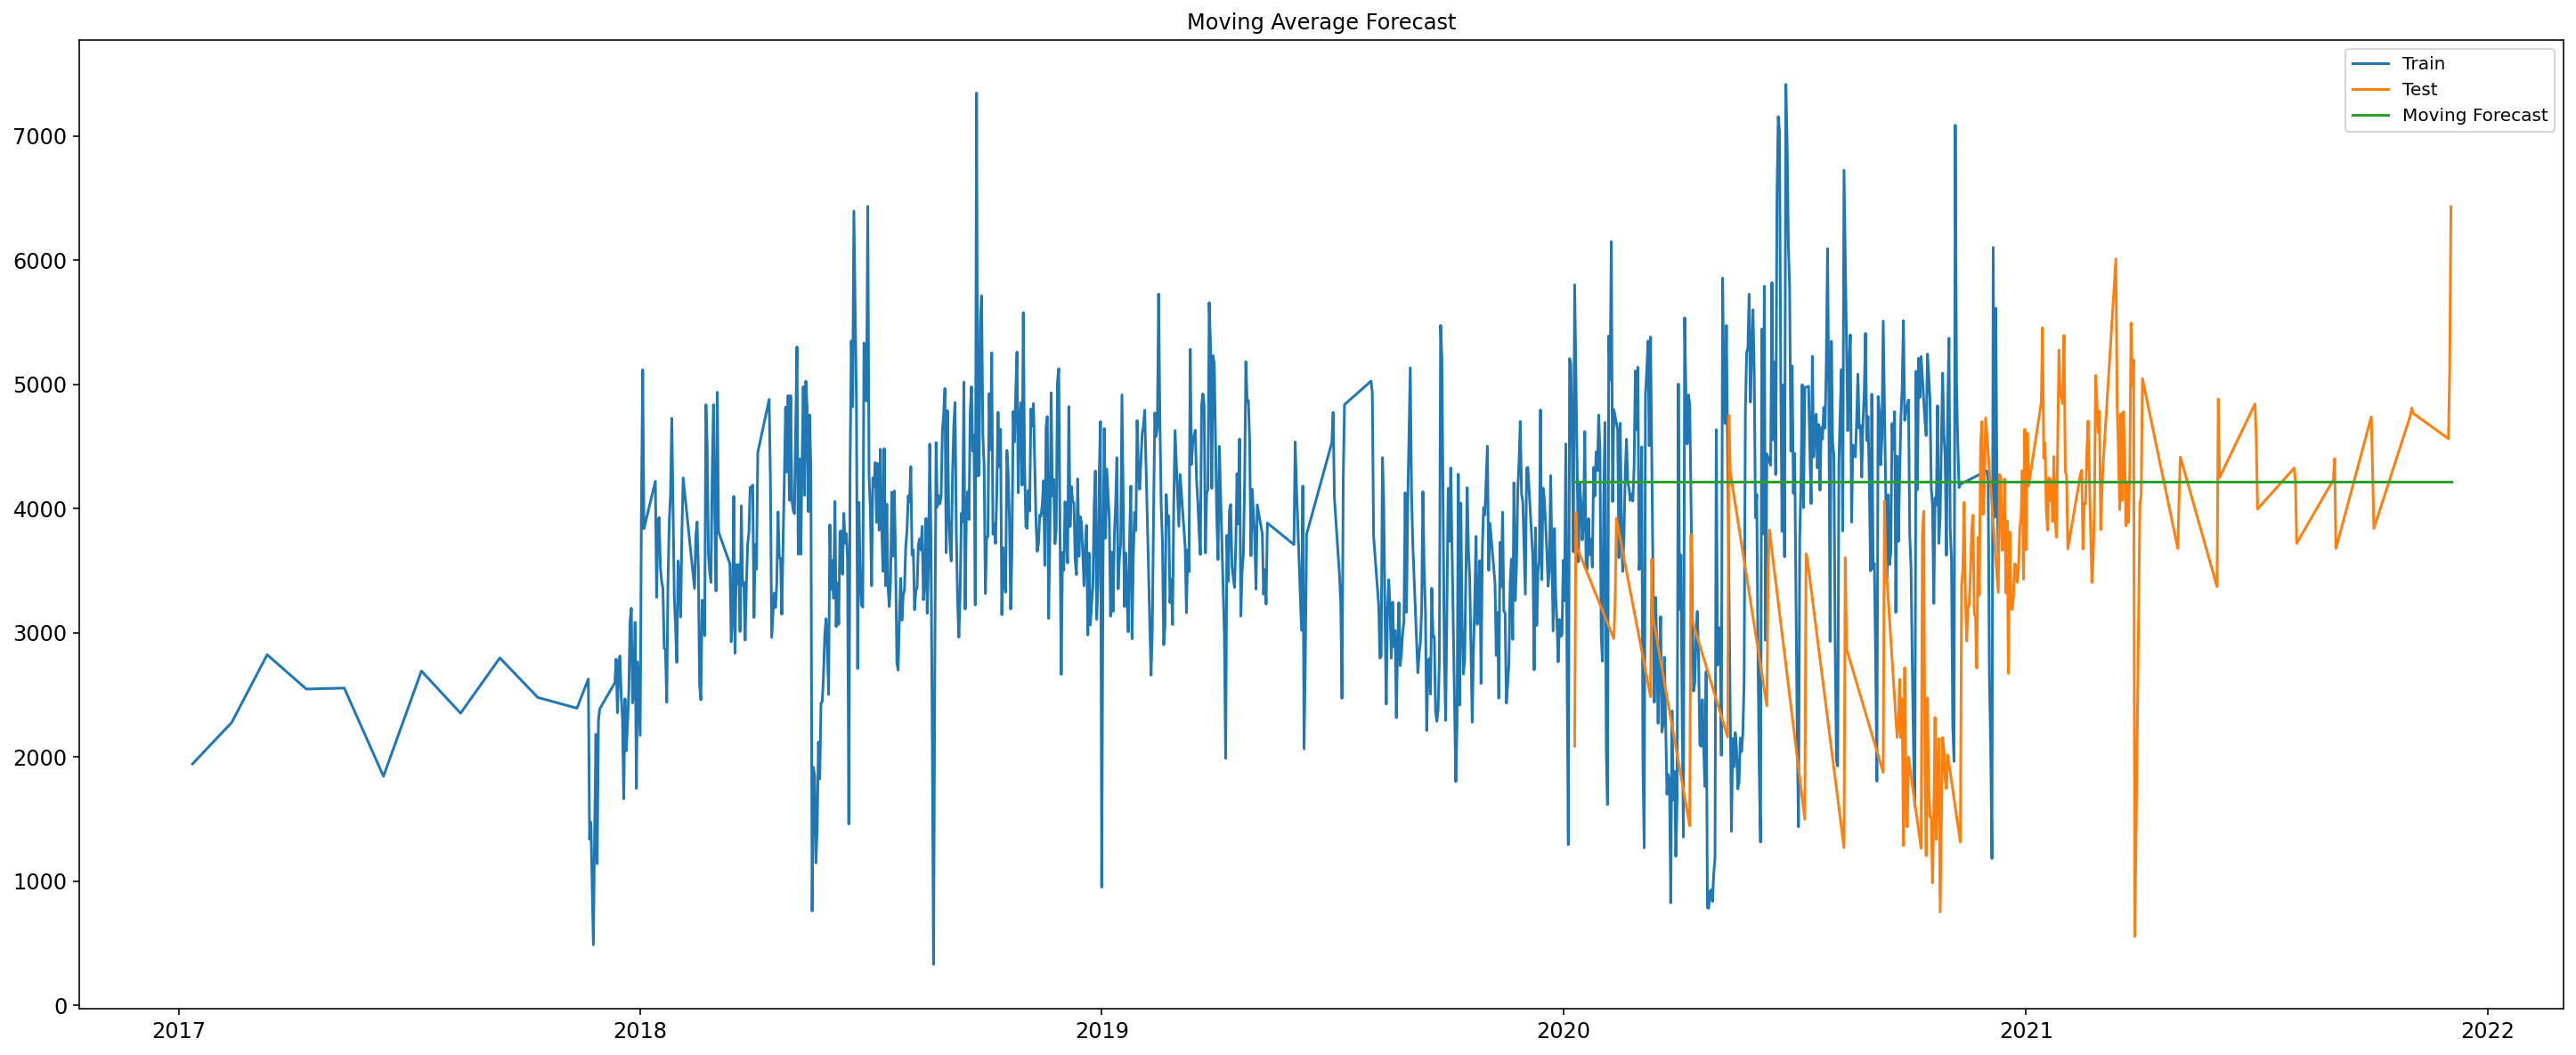

In [27]:
y_hat_avg_moving = test_store.copy()
y_hat_avg_moving['moving_avg_forcast'] = train_store.Sales.rolling(90).mean().iloc[-1]
plt.figure(figsize=(25,10))
plt.plot(train_store['Sales'], label='Train')
plt.plot(test_store['Sales'], label='Test')
plt.plot(y_hat_avg_moving['moving_avg_forcast'], label='Moving Forecast')
plt.legend(loc='best')
plt.title('Moving Average Forecast')

In [28]:
rms_avg_rolling = sqrt(mean_squared_error(test_store.Sales, y_hat_avg_moving.moving_avg_forcast))
print('ROLLING AVERAGE',rms_avg_rolling)

ROLLING AVERAGE 1220.692129291723


In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

label = le.fit_transform(train['Branch'])

label
train.drop("Branch", axis=1, inplace=True)
train["Branch"] = label

C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_4608\820562542.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop("Branch", axis=1, inplace=True)
C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_4608\820562542.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Branch"] = label


In [30]:
train

,Date,Orders,Sales,Cash,Talabat Card,Deliveroo Card,Carriage Card,Zomato Card,Uber Eats,Paid Online,Unpaid,Avg Per cheque,Sales_Per_Order,Year,Branch
0,2017-11-21,25,2627.0,1591.0,1036.0,0.0,0.0,0.0,0.0,0,0.0,105.08,105.080000,2017-11-21,0
1,2017-11-22,15,1449.0,1194.0,255.0,0.0,0.0,0.0,0.0,0,0.0,96.60,96.600000,2017-11-22,0
2,2017-11-23,11,1241.0,524.0,420.0,297.0,0.0,0.0,0.0,0,0.0,112.82,112.818182,2017-11-23,0
3,2017-11-25,13,843.0,531.0,312.0,0.0,0.0,0.0,0.0,0,0.0,64.85,64.846154,2017-11-25,0
4,2017-11-26,10,778.0,577.0,201.0,0.0,0.0,0.0,0.0,0,0.0,77.80,77.800000,2017-11-26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,2021-03-24,29,3319.0,521.8,1148.0,237.0,1273.0,0.0,56.0,0,83.2,114.45,114.448276,2021-03-24,1
3897,2021-03-25,29,3461.4,228.0,1374.0,1203.0,656.4,0.0,0.0,0,0.0,119.36,119.358621,2021-03-25,1
3898,2021-03-26,37,3873.2,207.0,1619.0,1192.0,764.0,0.0,0.0,0,91.2,104.68,104.681081,2021-03-26,1
3899,2021-03-27,20,2398.0,0.0,1279.0,810.0,309.0,0.0,0.0,0,0.0,119.90,119.900000,2021-03-27,1


In [31]:
X = train.iloc[:,2:3]
Y = train['Branch']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, train_size = 0.5, test_size = 0.5, random_state = 42)

**Decision Tree**

In [32]:
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_Train,Y_Train)
y_pred_dtc = dtc.predict(X_Test)
dtc_acc = accuracy_score(Y_Test,y_pred_dtc)

**Logistic Regression**

In [33]:
logr = LogisticRegression()
logr.fit(X_Train,Y_Train)
y_pred_logr = logr.predict(X_Test)
logr_acc = accuracy_score(Y_Test,y_pred_logr)

**K Neighbors Classifier**

In [34]:

knn = KNeighborsClassifier( metric='minkowski')
knn.fit(X_Train,Y_Train)
y_pred_knn = knn.predict(X_Test)
knn_acc = accuracy_score(Y_Test,y_pred_knn)

**Random Forrest**

In [35]:
rfc = RandomForestClassifier()
rfc.fit(X_Train,Y_Train)
y_pred_rfc = rfc.predict(X_Test)
rfc_acc = accuracy_score(Y_Test,y_pred_rfc)

**Neural Network**

In [36]:
nnc = MLPClassifier()
nnc.fit(X_Train,Y_Train)
y_pred_nnc = nnc.predict(X_Test)
nnc_acc = accuracy_score(Y_Test,y_pred_nnc)

**Score**

In [52]:
pd.DataFrame({"Algorithms":["Decision Tree","Logistic Regression","Naive Bayes","K Neighbors Classifier","Random Forest","Neural Network"],
"Scores":[dtc_acc,logr_acc,knn_acc,rfc_acc,nnc_acc]})

ValueError: All arrays must be of the same length